In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import ternary

print('Numpy version:', np.__version__)
print('Pandas version:',pd.__version__)
print('Matplotlib version:', matplotlib.__version__)
print("Ternary version:",ternary.__version__)

Numpy version: 1.17.4
Pandas version: 0.25.3
Matplotlib version: 3.1.3
Ternary version: 1.0.6


# DATA
## Enzyme

In [32]:
enzyme_base = pd.read_csv('Enzyme_tradeoff_20201.csv',index_col=0)
enzyme_base.head()

,0,1,2,3,4,5,6,7,8,9,...,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190
Tax1,0.0,1.541601,1.490596,1.462242,1.431231,1.410405,1.399296,1.395754,1.415045,1.441666,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax2,0.0,0.233644,0.230462,0.229648,0.228956,0.228372,0.225650,0.225269,0.225025,0.224848,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,0.0,2.323268,2.264856,2.220183,2.173948,2.142919,2.143990,2.154077,2.158130,2.189604,...,2.609225,2.563910,2.520040,2.459079,2.416750,2.367227,2.324840,2.281995,2.232374,2.181070
Tax4,0.0,0.182814,0.182570,0.182817,0.184297,0.182297,0.184688,0.187080,0.190893,0.194081,...,23.793234,23.770031,23.707253,23.610670,23.567970,23.584372,23.351393,23.256016,23.201954,23.145256
Tax5,0.0,0.492399,0.489036,0.486209,0.484336,0.483122,0.482633,0.482585,0.483603,0.484801,...,0.119354,0.118929,0.118484,0.118032,0.117596,0.117242,0.116698,0.116202,0.115745,0.115313


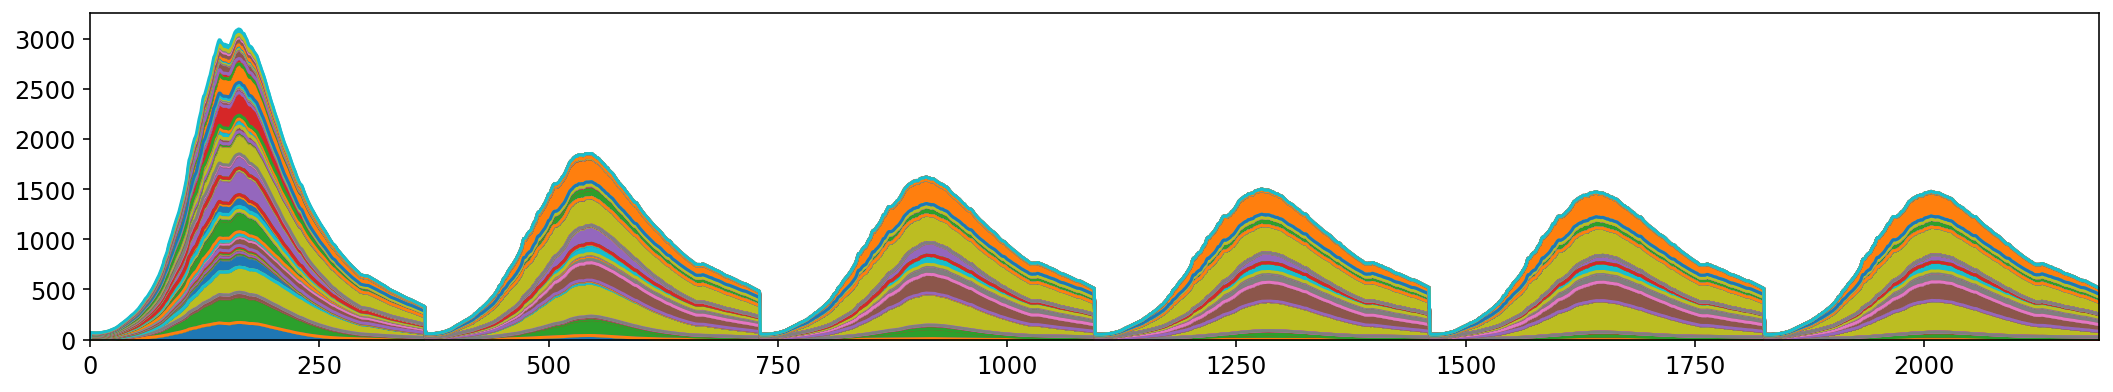

In [33]:
enzyme_base.T.plot.area(fontsize=12,legend=False,figsize=(18,3))

## Osmolyte

In [34]:
osmolyte_base = pd.read_csv('Osmolyte_tradeoff_20201.csv',index_col=0)
osmolyte_base.head()

,0,1,2,3,4,5,6,7,8,9,...,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190
Tax1,0.0,0.000247,0.014992,0.029170,0.049910,0.066615,0.083419,0.095832,0.117976,0.129566,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax2,0.0,0.000148,0.001070,0.002116,0.003771,0.005282,0.006800,0.008001,0.009905,0.010902,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,0.0,0.000245,0.034357,0.063312,0.106075,0.137682,0.168972,0.189356,0.227730,0.242820,...,0.080851,0.083968,0.083832,0.079512,0.080202,0.085246,0.070004,0.067581,0.066365,0.065797
Tax4,0.0,0.000192,0.009963,0.020758,0.037577,0.052220,0.067825,0.079840,0.099059,0.109527,...,5.625964,5.963580,6.025009,5.837394,5.996185,6.504079,5.369576,5.263701,5.268814,5.377948
Tax5,0.0,0.000370,0.006316,0.013209,0.024391,0.034495,0.044851,0.052726,0.065539,0.071993,...,0.007454,0.008005,0.007994,0.007897,0.007980,0.008779,0.007227,0.006992,0.007113,0.007402


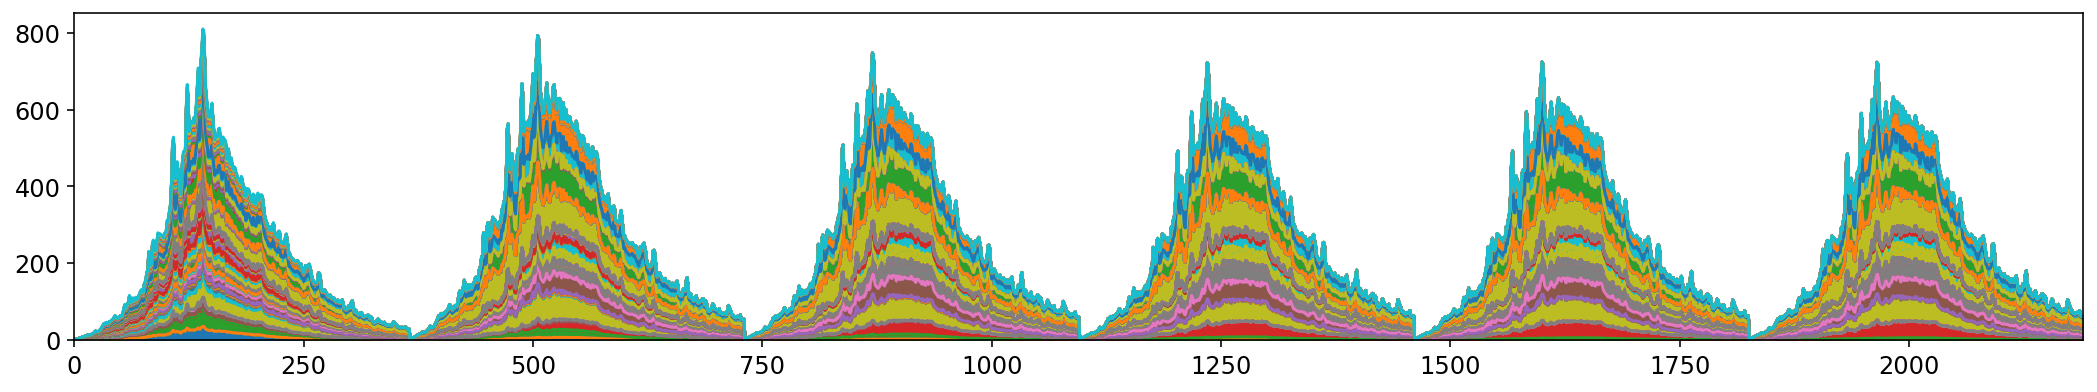

In [35]:
osmolyte_base.T.plot.area(fontsize=12,legend=False,figsize=(18,3))

## yield

In [36]:
yield_base = pd.read_csv('Yield_tradeoff_20201.csv',index_col=0)
yield_base.head()

,0,1,2,3,4,5,6,7,8,9,...,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190
Tax1,0.0,-2.997457,-2.356656,-1.777296,-0.949829,-0.291845,0.350297,0.815397,1.595183,1.971121,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax2,0.0,-0.422814,-0.389007,-0.355573,-0.303719,-0.256505,-0.205176,-0.167842,-0.109301,-0.078528,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,0.0,-3.394895,-2.643979,-2.009516,-1.101320,-0.435016,0.177432,0.562524,1.309370,1.559351,...,-2.266021,-2.146660,-2.090383,-2.086814,-2.012704,-1.848925,-2.077432,-2.045389,-1.967647,-1.903537
Tax4,0.0,-0.848852,-0.674174,-0.482332,-0.188355,0.082774,0.350426,0.553860,0.879348,1.051459,...,-12.597144,-7.029579,-6.016780,-9.044330,-6.161246,2.230188,-16.372583,-16.669882,-14.267686,-12.047376
Tax5,0.0,-0.949917,-0.847870,-0.730937,-0.546368,-0.380628,-0.212322,-0.085008,0.120014,0.221972,...,-0.113852,-0.104857,-0.104591,-0.105502,-0.103433,-0.090638,-0.113943,-0.115340,-0.110032,-0.104528


### get rid of negative vals

In [37]:
yield_base[yield_base < 0] = 0
yield_base.head()

,0,1,2,3,4,5,6,7,8,9,...,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190
Tax1,0.0,0.0,0.0,0.0,0.0,0.000000,0.350297,0.815397,1.595183,1.971121,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Tax2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Tax3,0.0,0.0,0.0,0.0,0.0,0.000000,0.177432,0.562524,1.309370,1.559351,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Tax4,0.0,0.0,0.0,0.0,0.0,0.082774,0.350426,0.553860,0.879348,1.051459,...,0.0,0.0,0.0,0.0,0.0,2.230188,0.0,0.0,0.0,0.0
Tax5,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.120014,0.221972,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


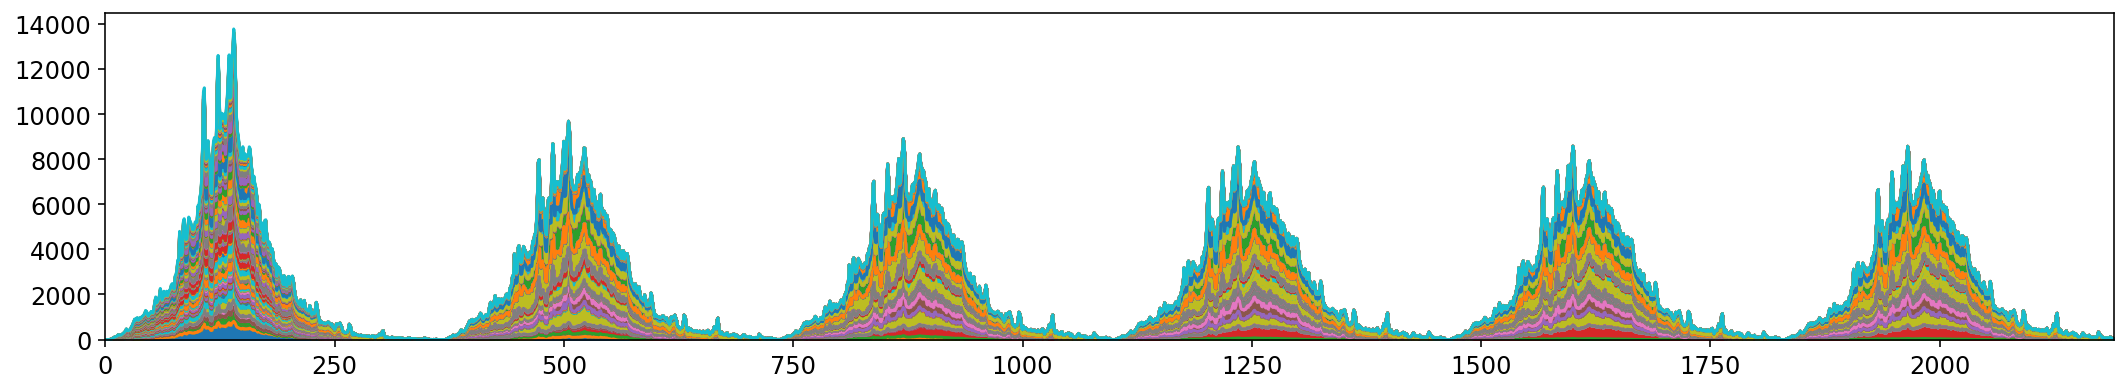

In [38]:
yield_base.T.plot.area(fontsize=12,legend=False,figsize=(18,3))

## tradeoffx10

In [39]:
enzyme_basex10 = pd.read_csv('Enzyme_tradeoffx10_20201.csv',index_col=0)
enzyme_basex10.head()

,0,1,2,3,4,5,6,7,8,9,...,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190
Tax1,0.0,1.541601,1.490596,1.460356,1.425708,1.398729,1.379343,1.365459,1.372542,1.384064,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax2,0.0,0.233644,0.230462,0.229629,0.228897,0.228238,0.225412,0.224895,0.224491,0.224117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax3,0.0,2.323268,2.264856,2.213884,2.156192,2.106001,2.081852,2.061029,2.031720,2.021263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax4,0.0,0.182814,0.182570,0.182645,0.183759,0.181098,0.182541,0.183696,0.186027,0.187383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax5,0.0,0.492399,0.489036,0.485983,0.483622,0.481496,0.479712,0.477979,0.477012,0.475749,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


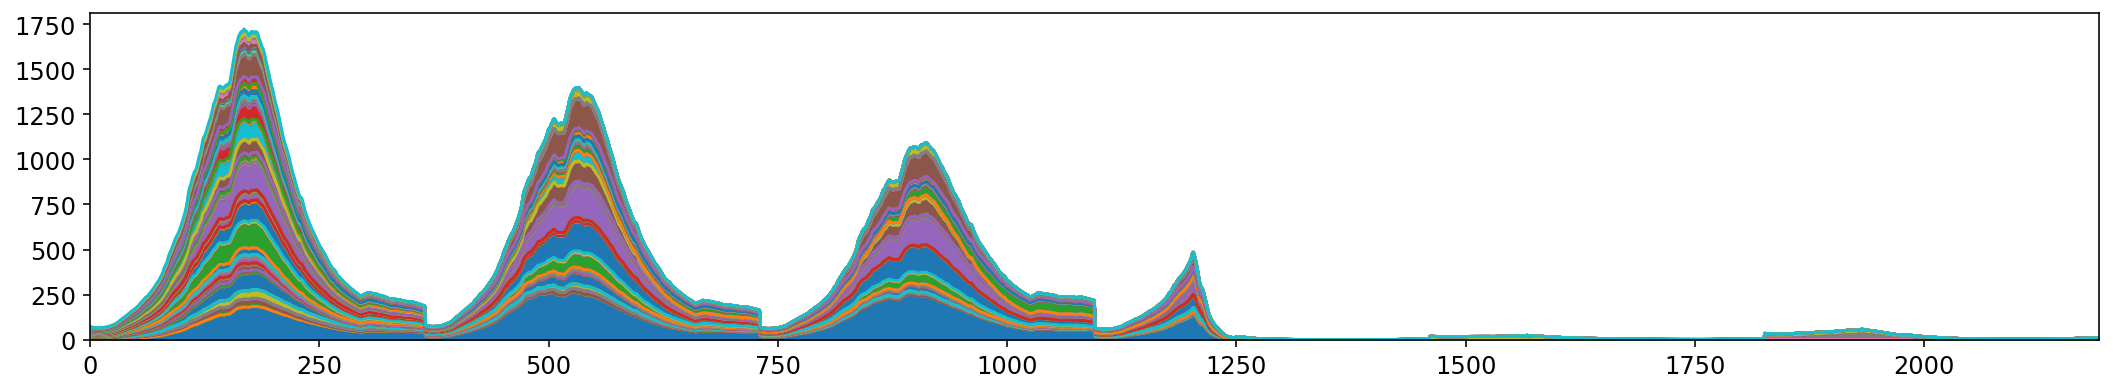

In [40]:
enzyme_basex10.T.plot.area(fontsize=12,legend=False,figsize=(18,3))

In [11]:
osmolyte_basex10 = pd.read_csv('Osmolyte_tradeoffx10_20201.csv',index_col=0)
osmolyte_basex10.head()

,0,1,2,3,4,5,6,7,8,9,...,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190
Tax1,0.0,0.000247,0.147777,0.289370,0.495858,0.660543,0.824366,0.942483,1.154681,1.260060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax2,0.0,0.000148,0.009388,0.019853,0.036413,0.051519,0.066732,0.078784,0.097895,0.108020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax3,0.0,0.000245,0.341422,0.629725,1.051898,1.355365,1.646637,1.821498,2.160579,2.264676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax4,0.0,0.000192,0.097917,0.205691,0.373109,0.517661,0.670095,0.785114,0.969357,1.064971,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax5,0.0,0.000370,0.059856,0.128739,0.240317,0.340701,0.443104,0.520340,0.645877,0.707885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


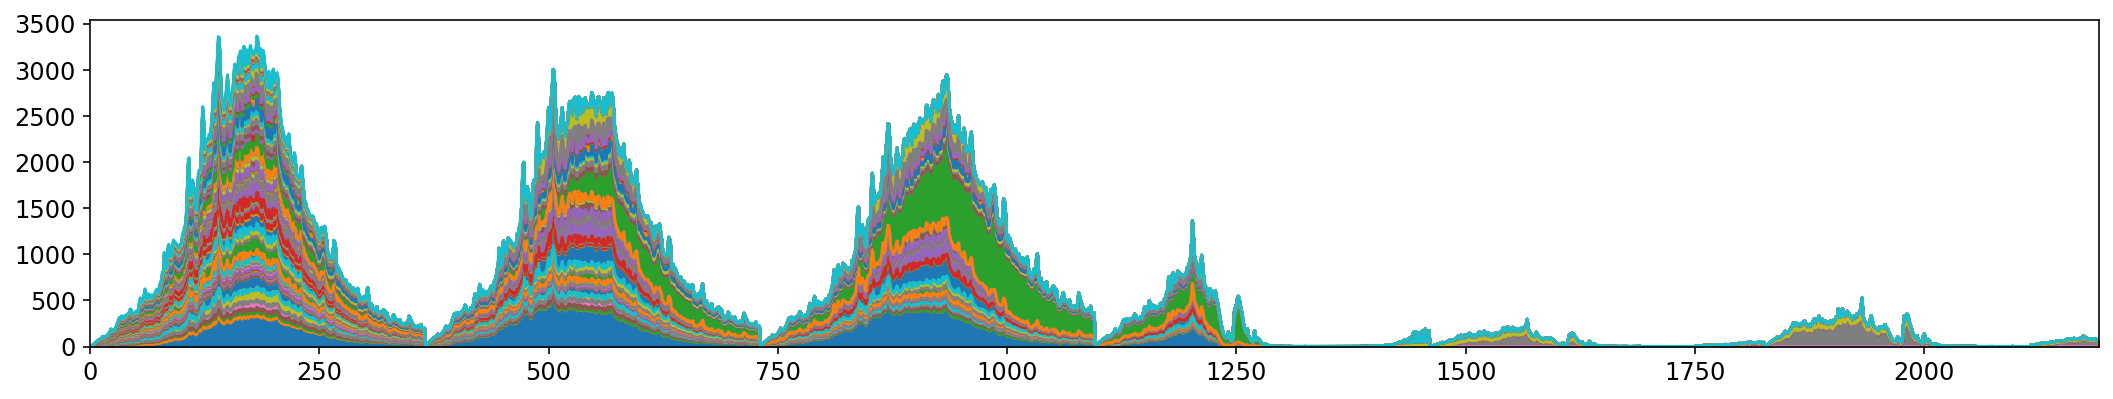

In [12]:
osmolyte_basex10.T.plot.area(fontsize=12,legend=False,figsize=(18,3))

In [13]:
yield_basex10 = pd.read_csv('Yield_tradeoffx10_20201.csv',index_col=0)
yield_basex10.head()

,0,1,2,3,4,5,6,7,8,9,...,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190
Tax1,0.0,-2.997457,-2.489440,-2.034691,-1.389583,-0.876715,-0.381580,-0.024909,0.553579,0.825318,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax2,0.0,-0.422814,-0.397325,-0.373276,-0.336246,-0.302510,-0.264648,-0.237783,-0.195938,-0.173475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax3,0.0,-3.394895,-2.951046,-2.569404,-2.035237,-1.638862,-1.294147,-1.078097,-0.675301,-0.549490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax4,0.0,-0.848852,-0.762128,-0.666823,-0.523222,-0.382544,-0.254148,-0.157633,-0.005255,0.073148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax5,0.0,-0.949917,-0.901409,-0.846142,-0.761494,-0.685412,-0.608661,-0.550063,-0.458384,-0.411578,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
yield_basex10[yield_basex10 < 0] = 0
yield_basex10.head()

,0,1,2,3,4,5,6,7,8,9,...,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190
Tax1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.553579,0.825318,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.073148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


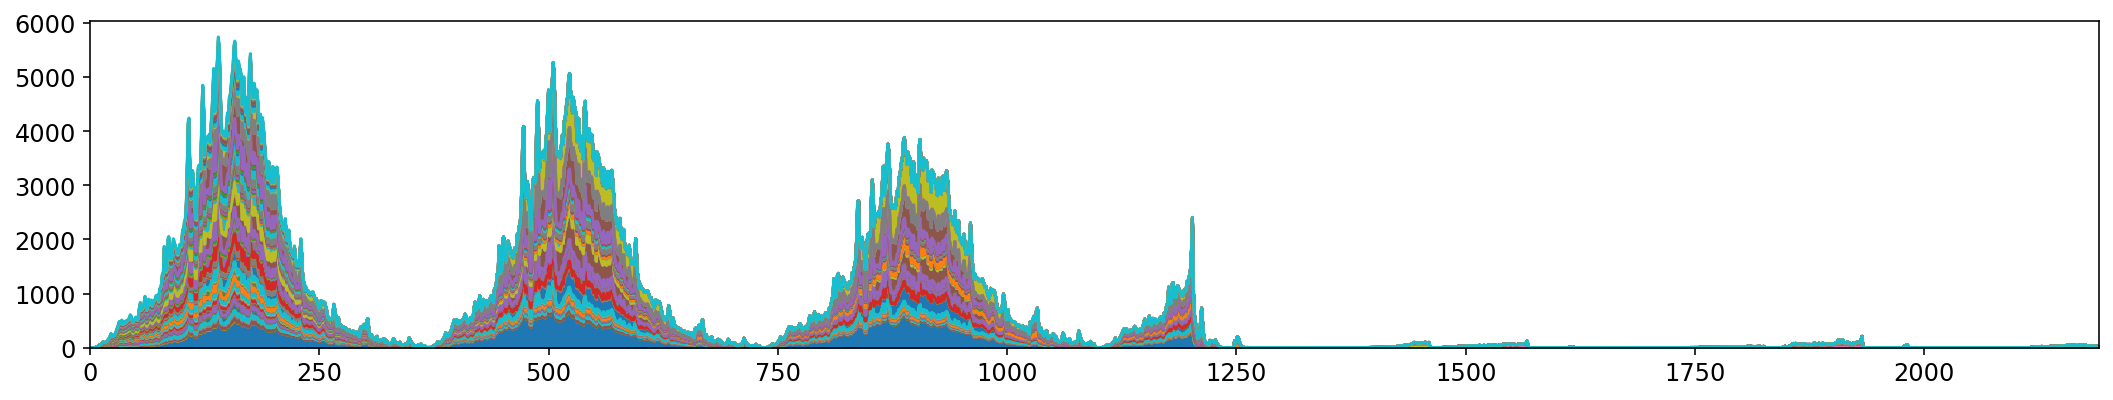

In [15]:
yield_basex10.T.plot.area(fontsize=12,legend=False,figsize=(18,3))

## define function of deriving data of a specific day

In [16]:
def day_data(day):
    
    day = pd.concat([enzyme_base.loc[:,str(day)], osmolyte_base.loc[:,str(day)],yield_base.loc[:,str(day)]],axis=1,sort=False)
    day.columns = ['Enzyme','Osmolyte', 'Yield']
    total = day.sum(axis=1)
    day_alive = 100*day[total>0].divide(total[total>0],axis=0)
    
    return day_alive

In [17]:
day_2_alive = day_data(2)
day_2_alive

,Enzyme,Osmolyte,Yield
Tax1,99.004220,0.995780,0.0
Tax2,99.537984,0.462016,0.0
Tax3,98.505725,1.494275,0.0
Tax4,94.825501,5.174499,0.0
Tax5,98.724923,1.275077,0.0
...,...,...,...
Tax96,99.670910,0.329090,0.0
Tax97,99.735683,0.264317,0.0
Tax98,99.215080,0.784920,0.0
Tax99,99.442507,0.557493,0.0


In [18]:
day_5_alive = day_data(5)
day_5_alive

,Enzyme,Osmolyte,Yield
Tax1,95.489917,4.510083,0.000000
Tax2,97.739507,2.260493,0.000000
Tax3,93.962912,6.037088,0.000000
Tax4,57.454290,16.458046,26.087664
Tax5,93.335875,6.664125,0.000000
...,...,...,...
Tax96,98.621443,1.378557,0.000000
Tax97,98.866049,1.133951,0.000000
Tax98,96.716787,3.283213,0.000000
Tax99,97.617695,2.382305,0.000000


## base

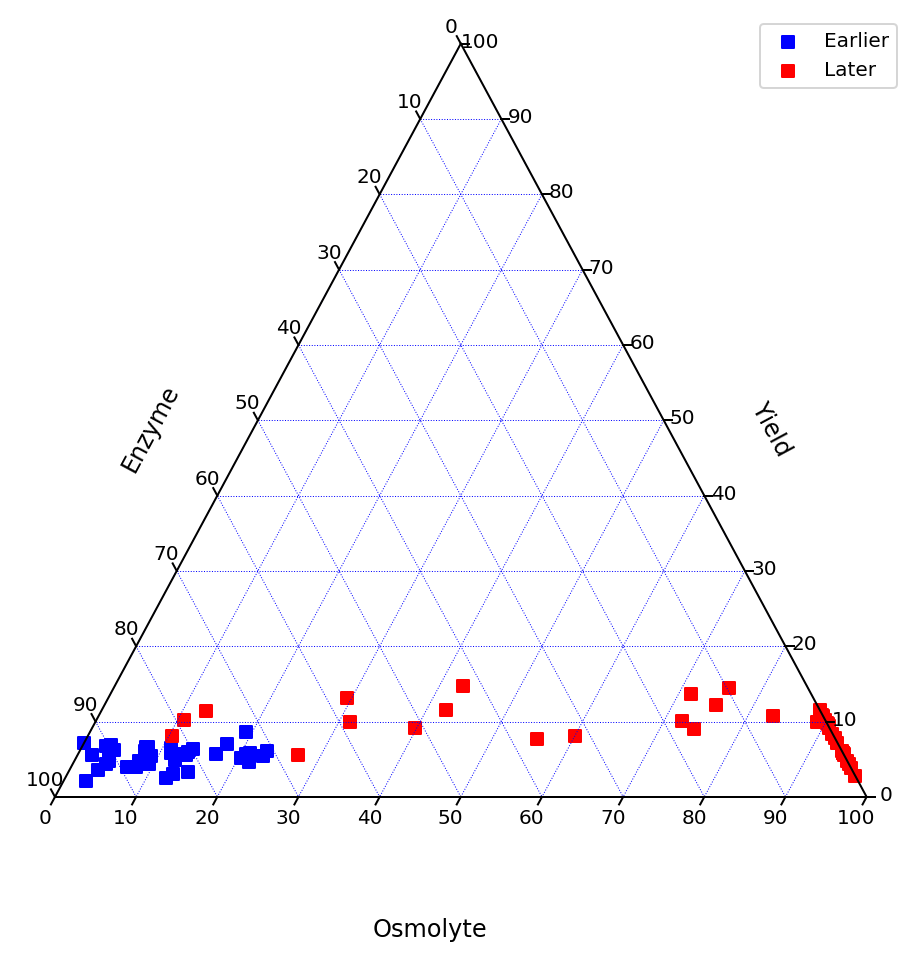

In [19]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(8,8)

#tax.scatter(day_2_alive.values, marker='.', color='red', label="Red Squares")
#tax.scatter(day_5_alive.values, marker='.', color='red',label="Red Squares")
#tax.scatter(day_data(100).values, marker='.', color='orange',label="Red Squares")
#tax.scatter(day_data(150).values, marker='.', color='green',label="Red Squares")
#tax.scatter(day_data(200).values, marker='.', color='black',label="Red Squares")
tax.scatter(day_data(365*3-257).values, marker='s', color='blue',label="Earlier") # start of dry season

#tax.scatter(day_data(365*3-97).values,  marker='s', color='orange', label="Later")   # drought peak

tax.scatter(day_data(365*3-75).values,  marker='s', color='red', label="Later")   # end of dry season


tax.legend()

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =12
tax.left_axis_label("Enzyme", fontsize=fontsize, offset=0.14)
tax.right_axis_label("Yield", fontsize=fontsize, offset=0.14)
tax.bottom_axis_label("Osmolyte", fontsize=fontsize, offset=0.14)

tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.savefig('scatter_ternary.pdf')
tax.show()

## define function of tradeoffx4

In [20]:
def day_datax4(day):
    
    day = pd.concat([enzyme_basex4.loc[:,str(day)], osmolyte_basex4.loc[:,str(day)],yield_basex4.loc[:,str(day)]],axis=1,sort=False)
    day.columns = ['Enzyme','Osmolyte', 'Yield']
    total = day.sum(axis=1)
    day_alive = 100*day[total>0].divide(total[total>0],axis=0)
    
    return day_alive

## define function of tradeoffx10

In [21]:
def day_datax10(day):
    
    day = pd.concat([enzyme_basex10.loc[:,str(day)], osmolyte_basex10.loc[:,str(day)],yield_basex10.loc[:,str(day)]],axis=1,sort=False)
    day.columns = ['Enzyme','Osmolyte', 'Yield']
    total = day.sum(axis=1)
    day_alive = 100*day[total>0].divide(total[total>0],axis=0)
    
    return day_alive

## base vs basex10

In [22]:
day_data(365*6-75)

,Enzyme,Osmolyte,Yield
Tax3,94.284503,5.715497,0.000000
Tax4,28.138518,12.903943,58.957539
Tax5,89.452530,10.547470,0.000000
Tax9,91.565579,8.434421,0.000000
Tax23,69.209056,13.414992,17.375952
Tax26,89.295815,10.704185,0.000000
Tax28,73.645614,14.199313,12.155072
Tax39,10.573505,10.141339,79.285156
Tax40,72.552282,11.917773,15.529945
Tax45,93.754906,6.245094,0.000000


In [23]:
day_datax10(365*6-75)

,Enzyme,Osmolyte,Yield
Tax28,51.426011,48.573989,0.0
Tax69,57.375876,42.624124,0.0
Tax80,38.279068,61.720932,0.0
Tax94,31.294190,68.705810,0.0


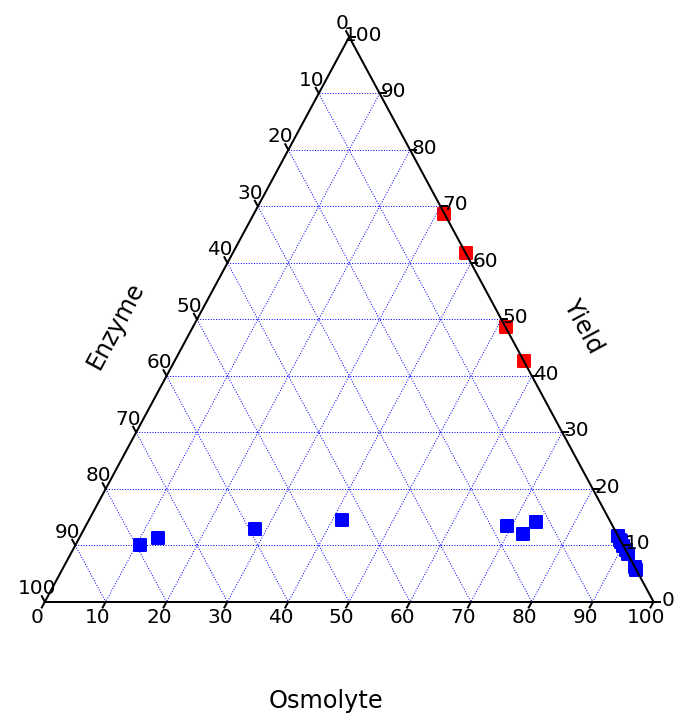

In [25]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(6,6)

#tax.scatter(day_data(365*6-200).values,    marker='o', color='blue',label="Red Squares")
#tax.scatter(day_datax10(365*6-200).values, marker='s', color='red', label="Red Squares")

tax.scatter(day_data(365*6-75).values,  marker='s', color='blue', label="Base")
#tax.scatter(day_datax4(365*6-75).values, marker='s', color='green',label="Basex4")
tax.scatter(day_datax10(365*6-75).values, marker='s', color='red',label="Basex10")
#tax.legend()

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =12
tax.left_axis_label("Enzyme", fontsize=fontsize, offset=0.14)
tax.right_axis_label("Yield", fontsize=fontsize, offset=0.14)
tax.bottom_axis_label("Osmolyte", fontsize=fontsize, offset=0.14)

tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.savefig('scatter_ternary.pdf')
tax.show()

# Community-level

In [26]:
community_base = pd.concat([enzyme_base.sum(axis=0),osmolyte_base.sum(axis=0),yield_base.sum(axis=0)],axis=1,sort=False)
community_base.columns = ['Enzyme','Osmolyte', 'Yield']
total = community_base.sum(axis=1)
community_base_alive = 100*community_base[total>0].divide(total[total>0],axis=0)
community_base_alive

,Enzyme,Osmolyte,Yield
1,99.954277,0.045723,0.000000
2,98.881939,1.118061,0.000000
3,97.838172,2.161828,0.000000
4,96.271293,3.728707,0.000000
5,92.490224,4.864495,2.645281
...,...,...,...
2186,73.794945,10.485542,15.719513
2187,82.322183,9.762699,7.915118
2188,82.528738,9.668287,7.802974
2189,81.432670,9.605804,8.961526


In [35]:
community_basex4 = pd.concat([enzyme_basex4.sum(axis=0),osmolyte_basex4.sum(axis=0),yield_basex4.sum(axis=0)],axis=1,sort=False)
community_basex4.columns = ['Enzyme','Osmolyte', 'Yield']
total = community_basex4.sum(axis=1)
community_basex4_alive = 100*community_basex4[total>0].divide(total[total>0],axis=0)
community_basex4_alive

,Enzyme,Osmolyte,Yield
1,99.954277,0.045723,0.000000
2,99.943268,0.056732,0.000000
3,99.932334,0.067666,0.000000
4,99.915706,0.084294,0.000000
5,95.417353,0.093686,4.488961
...,...,...,...
3646,78.346395,0.151144,21.502461
3647,88.287720,0.149658,11.562622
3648,88.352653,0.148671,11.498677
3649,87.424166,0.147948,12.427886


In [27]:
community_basex10 = pd.concat([enzyme_basex10.sum(axis=0),osmolyte_basex10.sum(axis=0),yield_basex10.sum(axis=0)],axis=1,sort=False)
community_basex10.columns = ['Enzyme','Osmolyte', 'Yield']
total = community_basex10.sum(axis=1)
community_basex10_alive = 100*community_basex10[total>0].divide(total[total>0],axis=0)
community_basex10_alive

,Enzyme,Osmolyte,Yield
1,99.954277,0.045723,0.000000
2,90.178258,9.821742,0.000000
3,82.184747,17.815253,0.000000
4,72.301554,27.698446,0.000000
5,65.644151,34.246230,0.109618
...,...,...,...
2186,7.696856,68.096289,24.206856
2187,9.452541,69.814745,20.732714
2188,9.508167,69.087001,21.404832
2189,9.150102,67.319707,23.530191


### year-6

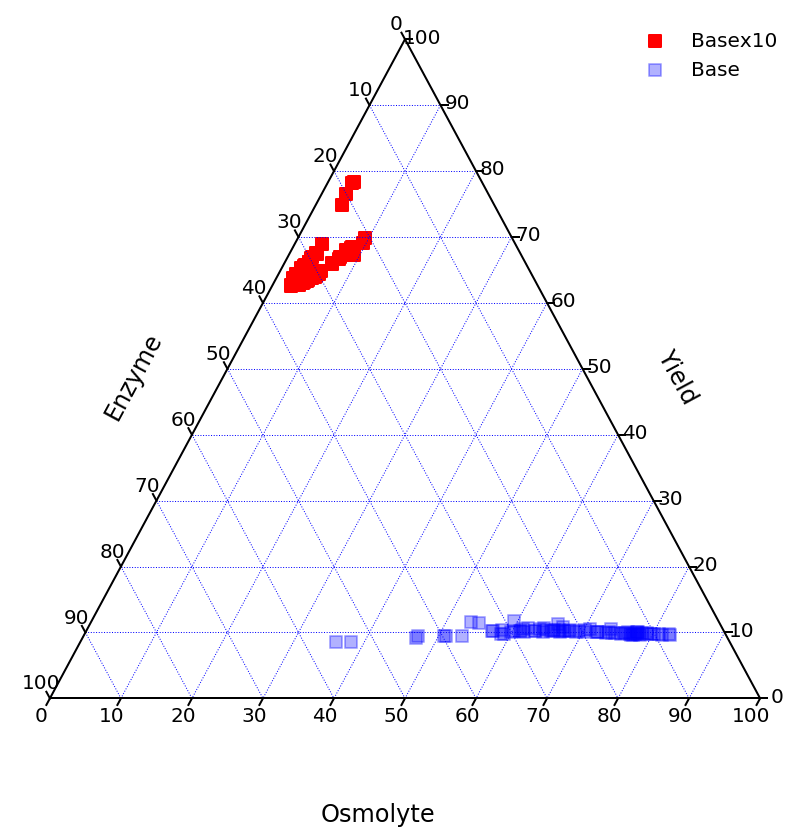

In [28]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(7,7)

tax.scatter(community_basex10_alive.iloc[365*6-75:365*6-0,:].values, marker='s', color='red',label="Basex10")
#tax.scatter(community_basex4_alive.iloc[365*6-75:365*6-0,:].values, marker='s', color='green', label="Basex4",alpha=0.5)
tax.scatter(community_base_alive.iloc[365*6-75:365*6-0,:].values, marker='s', color='blue', label="Base",alpha=0.3)

tax.legend(frameon=False)

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =12
tax.left_axis_label("Enzyme", fontsize=fontsize, offset=0.14)
tax.right_axis_label("Yield", fontsize=fontsize, offset=0.14)
tax.bottom_axis_label("Osmolyte", fontsize=fontsize, offset=0.14)

tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.savefig('scatter_ternary.pdf')
tax.show()

### year-9

ValueError: not enough values to unpack (expected 2, got 0)

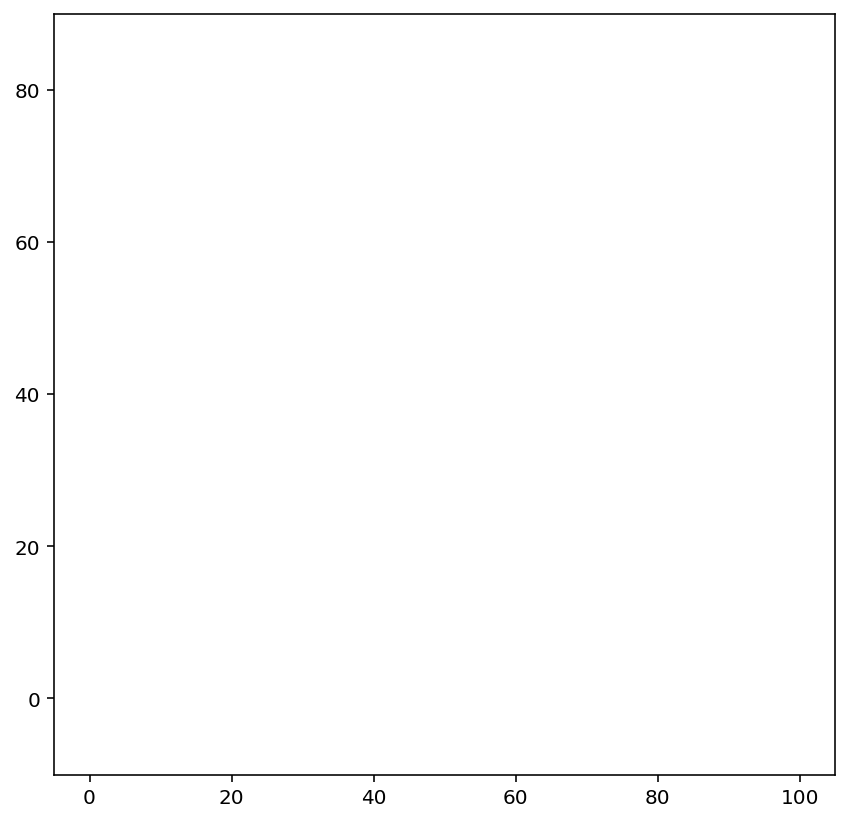

In [29]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(7,7)


tax.scatter(community_basex10_alive.iloc[365*9-75:365*9-0,:].values, marker='s', color='red',label="Basex10")
#tax.scatter(community_basex4_alive.iloc[365*9-75:365*9-0,:].values, marker='s', color='green', label="Basex4",alpha=0.5)
tax.scatter(community_base_alive.iloc[365*9-75:365*9-0,:].values, marker='s', color='blue', label="Base", alpha=0.3)

tax.legend(frameon=False)

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =12
tax.left_axis_label("Enzyme", fontsize=fontsize, offset=0.14)
tax.right_axis_label("Yield", fontsize=fontsize, offset=0.14)
tax.bottom_axis_label("Osmolyte", fontsize=fontsize, offset=0.14)

tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.savefig('scatter_ternary.pdf')
tax.show()